<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/Time%20Series%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

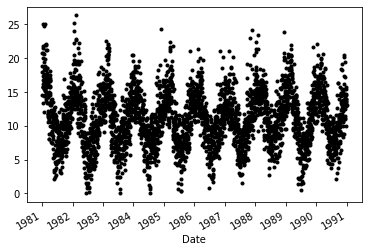

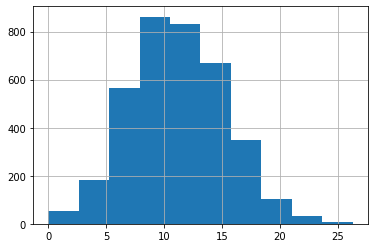

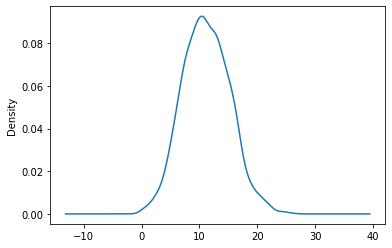

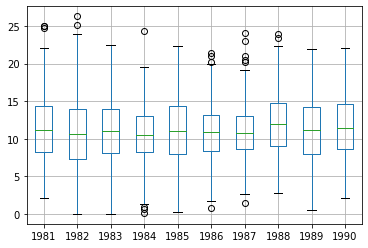

In [40]:
from google.colab import files
import pandas as pd
from matplotlib import pyplot

file = files.upload()

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame()

# Split data so transposed by year, month, day & temperature
df['year'] = [series.index[i].year for i in range(len(series))]
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series[i] for i in range(len(series))]

# Line/dot plot
# Plot using 'dots' instead of joining each point up with a line (line plot)
series.plot(style='k.')
pyplot.show()

# Histogram
# Produces the best possible histogram with the area under the curve equal to 1 i.e. probability density curve
# The histogram algorithm automatically selects the size of the bins (bar width) based on the spread of the 
# values in the data
series.hist()
pyplot.show()

# Density Plots (kde & Gaussian)
#series.plot(kind='kde')
series.plot.density()
pyplot.show()

# Box & Whisker Plot
# Box is drawn around the 25th & 75th percentiles of the data that captures the middle 50% of observations
# A line is drawn at the 50th percentile (the median)
# Whiskers are drawn above & below the box to summarize the general extents of the observations
# Dots/circles are drawn for outliers outside of the whiskers/extents of the data

# Group data into years & plot as box/whiskers plot
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()